In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
num_classes=124
X = X/255.0

y=np.array(y)

In [19]:


model = Sequential()

model.add(Conv2D(512, (5, 5), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))




model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors



model.add(Dense(124))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 116, 116, 512)     13312     
_________________________________________________________________
activation (Activation)      (None, 116, 116, 512)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 58, 58, 512)       0         
_________________________________________________________________
dropout (Dropout)            (None, 58, 58, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 512)       2359808   
_________________________________________________________________
activation_1 (Activation)    (None, 56, 56, 512)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 512)       0         
__________

In [20]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [21]:
model.fit(X, y, batch_size=4, epochs=100, validation_split=0.01)

Train on 7746 samples, validate on 79 samples
Epoch 1/100
1160/7746 [===>..........................] - ETA: 3:15 - loss: 15.9680 - acc: 0.0069

KeyboardInterrupt: 

In [21]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import pickle
import numpy as np
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
num_classes=2
X = X/255.0

In [22]:
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
#import seaborn as sns

In [23]:
batch_size = 32
num_classes = 125
epochs = 100
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Sa_ls.h5'

In [24]:
X.shape

(386, 100, 100, 1)

In [25]:
y=np.array(y)
y.shape

(386,)

In [26]:
X.shape[1:]

(100, 100, 1)

In [27]:
def plot_loss(history, title):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(title)
    plt.xlabel('Nb Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    val_loss = history.history['val_loss']
    min_idx = np.argmin(val_loss)
    min_val_loss = val_loss[min_idx]
    print('Minimum validation loss of {} reached at epoch {}'.format(min_val_loss, min_idx))

In [28]:
def plot_acc(history, title):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['acc'], label='Train')
    plt.plot(history.history['val_acc'], label='Validation')
    plt.title(title)
    plt.xlabel('Nb Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    val_acc = history.history['val_acc']
    max_idx = np.argmax(val_acc)
    max_val_acc = val_acc[max_idx]
    print('Maximum validation Acc of {} reached at epoch {}'.format(max_val_acc*100, max_idx))

In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
activation_7 (Activation)    (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 49, 49, 64)        18496     
__________

In [30]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=20
                             , verbose=0)
# Let's train the model using RMSprop
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [31]:
# Fit the model on the batches generated by datagen.flow().
history=model.fit(X, y, batch_size=batch_size,
                        epochs=epochs,
                        validation_split=0.2, callbacks=[earlystopper])

Train on 308 samples, validate on 78 samples
Epoch 1/100
308/308 [==============================] - 2s 6ms/step - loss: 1.5490 - acc: 0.4838 - val_loss: 1.3960 - val_acc: 0.4744
Epoch 2/100
308/308 [==============================] - 1s 2ms/step - loss: 0.7262 - acc: 0.6201 - val_loss: 1.0845 - val_acc: 0.4744
Epoch 3/100
308/308 [==============================] - 1s 2ms/step - loss: 0.7223 - acc: 0.6429 - val_loss: 1.2783 - val_acc: 0.5641
Epoch 4/100
308/308 [==============================] - 1s 2ms/step - loss: 0.7091 - acc: 0.6364 - val_loss: 0.9858 - val_acc: 0.5513
Epoch 5/100
308/308 [==============================] - 1s 2ms/step - loss: 0.6548 - acc: 0.6234 - val_loss: 1.0106 - val_acc: 0.5385
Epoch 6/100
308/308 [==============================] - 1s 2ms/step - loss: 0.6019 - acc: 0.6916 - val_loss: 1.0597 - val_acc: 0.5769
Epoch 7/100
308/308 [==============================] - 1s 2ms/step - loss: 0.6272 - acc: 0.7305 - val_loss: 1.1479 - val_acc: 0.5897
Epoch 8/100
308/308 [===

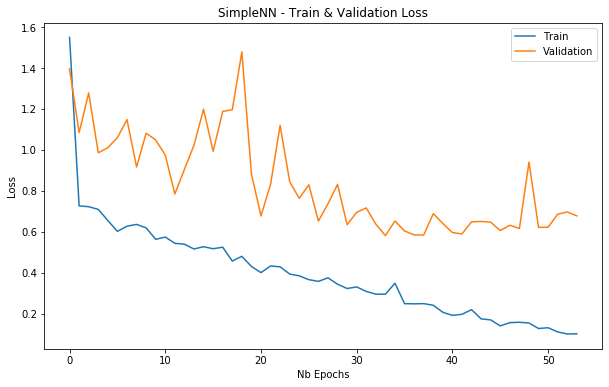

Minimum validation loss of 0.5810731909213922 reached at epoch 33


In [32]:
plot_loss(history, 'SimpleNN - Train & Validation Loss')

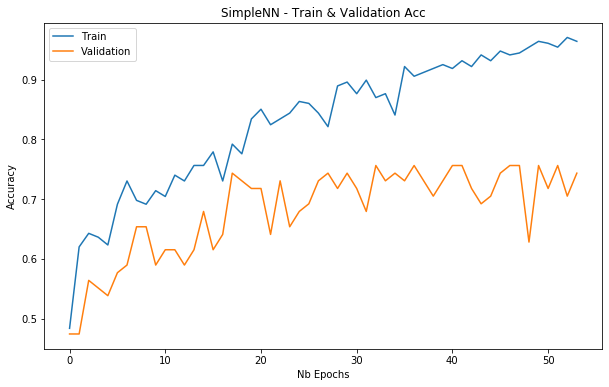

Maximum validation Acc of 75.64102594669049 reached at epoch 36


In [33]:
plot_acc(history, 'SimpleNN - Train & Validation Acc')

In [34]:
# Let's train the model using RMSprop
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
# Fit the model on the batches generated by datagen.flow().
history2=model.fit(X, y, batch_size=batch_size,
                        epochs=epochs,
                        validation_split=0.5)

Train on 193 samples, validate on 193 samples
Epoch 1/100
193/193 [==============================] - 2s 9ms/step - loss: 1.4808 - acc: 0.6269 - val_loss: 0.5923 - val_acc: 0.7409
Epoch 2/100
193/193 [==============================] - 1s 3ms/step - loss: 0.6637 - acc: 0.6788 - val_loss: 0.6289 - val_acc: 0.6528
Epoch 3/100
193/193 [==============================] - 1s 3ms/step - loss: 0.5317 - acc: 0.7358 - val_loss: 0.8043 - val_acc: 0.6477
Epoch 4/100
193/193 [==============================] - 1s 3ms/step - loss: 0.7095 - acc: 0.6943 - val_loss: 0.7119 - val_acc: 0.6528
Epoch 5/100
193/193 [==============================] - 1s 3ms/step - loss: 0.4766 - acc: 0.7772 - val_loss: 0.5571 - val_acc: 0.7254
Epoch 6/100
193/193 [==============================] - 1s 3ms/step - loss: 0.4222 - acc: 0.8342 - val_loss: 0.5647 - val_acc: 0.7565
Epoch 7/100
193/193 [==============================] - 1s 3ms/step - loss: 0.3846 - acc: 0.8238 - val_loss: 0.8132 - val_acc: 0.6528
Epoch 8/100
193/193 [==

193/193 [==============================] - 1s 3ms/step - loss: 4.3371e-04 - acc: 1.0000 - val_loss: 1.6641 - val_acc: 0.7720
Epoch 62/100
193/193 [==============================] - 1s 3ms/step - loss: 1.8270e-04 - acc: 1.0000 - val_loss: 1.6696 - val_acc: 0.7668
Epoch 63/100
193/193 [==============================] - 1s 3ms/step - loss: 1.9018e-04 - acc: 1.0000 - val_loss: 1.6756 - val_acc: 0.7720
Epoch 64/100
193/193 [==============================] - 1s 3ms/step - loss: 2.7053e-04 - acc: 1.0000 - val_loss: 1.7248 - val_acc: 0.7772
Epoch 65/100
193/193 [==============================] - 1s 3ms/step - loss: 1.1091e-04 - acc: 1.0000 - val_loss: 2.0275 - val_acc: 0.7617
Epoch 66/100
193/193 [==============================] - 1s 3ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 1.9885 - val_acc: 0.7513
Epoch 67/100
193/193 [==============================] - 1s 3ms/step - loss: 0.0072 - acc: 0.9948 - val_loss: 1.9425 - val_acc: 0.7513
Epoch 68/100
193/193 [==============================] -

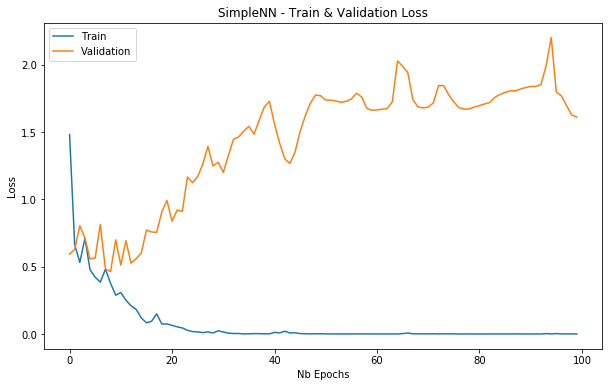

Minimum validation loss of 0.4638911399198937 reached at epoch 8


In [36]:
plot_loss(history2, 'SimpleNN - Train & Validation Loss')

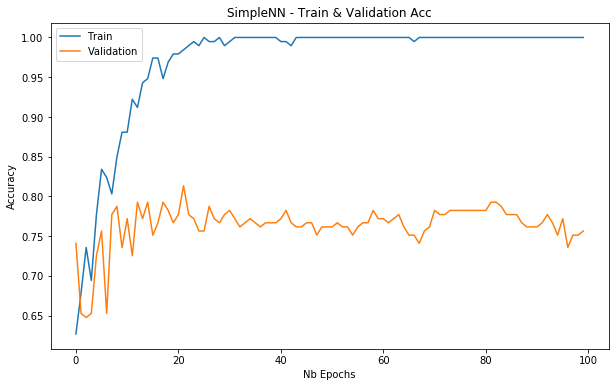

Maximum validation Acc of 81.34715025906736 reached at epoch 21


In [37]:
plot_acc(history2, 'SimpleNN - Train & Validation Acc')

In [38]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\HP PC\Desktop\CNN_LS\saved_models\Sa_ls.h5 
